In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import special
import importlib 
from tqdm import tqdm

In [2]:
import importlib
import numpy as np
import scipy.special as special
import matplotlib.pyplot as plt
import warnings
import dimensional_variables as dv
import setup_parameters as sp

DimensionalVariable = dv.DimensionalVariable
from lsw import lsw as LSW

In [3]:
plt.figure(figsize=(10, 8))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": 'monospace',
    "font.serif": ['Computer Modern Typewriter'],
    "font.size": 18
})

<Figure size 1000x800 with 0 Axes>

In [4]:
f = open('experiments-data/XENON1T.txt','r')
XENON1T = f.readlines()
XENON1T_mass     = [float(x.split('    ')[0]) for x in XENON1T]
XENON1T_coupling = [float(x.split('    ')[1]) for x in XENON1T]
XENON1T_top      = [1e-7                      for x in XENON1T]
f.close()

f = open('experiments-data/Dark_SRF_Pathfinder.txt','r')
DARKSRF = f.readlines()
DARKSRF_mass     = [float(x.split('    ')[0]) for x in DARKSRF]
DARKSRF_coupling = [float(x.split('    ')[1]) for x in DARKSRF]
DARKSRF_top      = [1e-7                      for x in DARKSRF]
f.close()

f = open('experiments-data/CROWS.txt','r')
CROWS = f.readlines()
CROWS_mass     = [float(x.split('    ')[0]) for x in CROWS]
CROWS_coupling = [float(x.split('    ')[1]) for x in CROWS]
CROWS_top      = [1e-7                      for x in CROWS]
f.close()

f = open('experiments-data/Dark_SRF_project.txt','r')
DARKSRFpr = f.readlines()
DARKSRFpr_mass     = [float(x.split(' ')[0]) for x in DARKSRFpr]
DARKSRFpr_coupling = [float(x.split(' ')[1]) for x in DARKSRFpr]
DARKSRFpr_top      = [1e-7                      for x in DARKSRFpr]
f.close()

In [5]:
left  = -6
right = -2
num   = 200
masses = dv.DimensionalVariable(
    array=np.logspace(left,right,num),
    dimension='eV',
    SI_unit='meter',)
relerr = 1e-3

In [6]:
R = {'enveloped': {'TM010': 4.3e-2, 'TE011': 5.3e-2}, 'separated': 20e-2}
L = {'enveloped': 40e-2, 'separated': 5e-2}

d = {'d1': 10e-6, 'd2': 400e-6, 'd3': 1000e-6}

In [7]:
d_LaTeX = {'d1': r'$d = 10 \, \mu {\rm m}$', 
           'd2': r'$d = 400 \, \mu {\rm m}$',
           'd3': r'$d = 1000 \, \mu {\rm m}$'}

In [8]:
setups = {'DP':
          {'enveloped':
           {'TM010':
            {'d1' : LSW(particles_type='DP',
                        cavity_mode='TM010',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TM010'],
                                      L['enveloped'],d['d1']),
                        masses=masses),
             'd2' : LSW(particles_type='DP',
                        cavity_mode='TM010',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TM010'],
                                      L['enveloped'],d['d2']),
                        masses=masses),
             'd3' : LSW(particles_type='DP',
                        cavity_mode='TM010',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TM010'],
                                      L['enveloped'],d['d3']),
                        masses=masses),
            },
            'TE011': 
            {'d1' : LSW(particles_type='DP',
                        cavity_mode='TE011',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TE011'],
                                      L['enveloped'],d['d1']),
                        relerr=1e-6,
                        masses=masses),
             'd2' : LSW(particles_type='DP',
                        cavity_mode='TE011',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TE011'],
                                      L['enveloped'],d['d2']),
                        relerr=1e-6,
                        masses=masses),
             'd3' : LSW(particles_type='DP',
                        cavity_mode='TE011',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TE011'],
                                      L['enveloped'],d['d3']),
                        relerr=1e-6,
                        masses=masses),
            },
           },
           'separated':
           {'TM010':
            {'d1' : LSW(particles_type='DP',
                        cavity_mode='TM010',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d1']),
                        masses=masses),
             'd2' : LSW(particles_type='DP',
                        cavity_mode='TM010',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d2']),
                        masses=masses),
             'd3' : LSW(particles_type='DP',
                        cavity_mode='TM010',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d3']),
                        masses=masses),
            },
            'TE011': 
            {'d1' : LSW(particles_type='DP',
                        cavity_mode='TE011',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d1']),
                        masses=masses),
             'd2' : LSW(particles_type='DP',
                        cavity_mode='TE011',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d2']),
                        masses=masses),
             'd3' : LSW(particles_type='DP',
                        cavity_mode='TE011',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d3']),
                        masses=masses),
            },
           },
          },
          'ALP':
          {'enveloped':
           {'TM010':
            {'d1' : LSW(particles_type='ALP',
                        cavity_mode='TM010',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TM010'],
                                      L['enveloped'],d['d1']),
                        masses=masses),
             'd2' : LSW(particles_type='ALP',
                        cavity_mode='TM010',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TM010'],
                                      L['enveloped'],d['d2']),
                        masses=masses),
             'd3' : LSW(particles_type='ALP',
                        cavity_mode='TM010',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TM010'],
                                      L['enveloped'],d['d3']),
                        masses=masses),
            },
            'TE011': 
            {'d1' : LSW(particles_type='ALP',
                        cavity_mode='TE011',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TE011'],
                                      L['enveloped'],d['d1']),
                        masses=masses),
             'd2' : LSW(particles_type='ALP',
                        cavity_mode='TE011',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TE011'],
                                      L['enveloped'],d['d2']),
                        masses=masses),
             'd3' : LSW(particles_type='ALP',
                        cavity_mode='TE011',
                        setup_geometry='enveloped',
                        cavity_sizes=(R['enveloped']['TE011'],
                                      L['enveloped'],d['d3']),
                        masses=masses),
            },
           },
           'separated':
           {'TM010':
            {'d1' : LSW(particles_type='ALP',
                        cavity_mode='TM010',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d1']),
                        masses=masses),
             'd2' : LSW(particles_type='ALP',
                        cavity_mode='TM010',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d2']),
                        masses=masses),
             'd3' : LSW(particles_type='ALP',
                        cavity_mode='TM010',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d3']),
                        masses=masses),
            },
            'TE011': 
            {'d1' : LSW(particles_type='ALP',
                        cavity_mode='TE011',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d1']),
                        masses=masses),
             'd2' : LSW(particles_type='ALP',
                        cavity_mode='TE011',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d2']),
                        masses=masses),
             'd3' : LSW(particles_type='ALP',
                        cavity_mode='TE011',
                        setup_geometry='separated',
                        cavity_sizes=(R['separated'],
                                      L['separated'],d['d3']),
                        masses=masses),
            },
           },
          },
         }

In [9]:
couplings = {'DP': 
                {
                 'enveloped':     
                             {'TM010': [],
                              'TE011': []},
                 'separated':
                             {'TM010': [],     
                              'TE011': []},
                 },
             'ALP': 
                 {
                 'enveloped':     
                             {'TM010': [],    
                              'TE011': []},

                 'separated':
                             {'TM010': [], 
                              'TE011': []},                      
                 },
            }

In [10]:
s = setups['DP']['separated']['TM010']['d1']
s.Calculate(False)
s.get_plot_data()
couplings['DP']['separated']['TM010'].append(
    s.Sensitivity['smoothed'].array.value
)

s = setups['DP']['separated']['TM010']['d2']
s.Calculate(False)
s.get_plot_data()
couplings['DP']['separated']['TM010'].append(
    s.Sensitivity['smoothed'].array.value
)

s = setups['DP']['separated']['TM010']['d3']
s.Calculate(False)
s.get_plot_data()
couplings['DP']['separated']['TM010'].append(
    s.Sensitivity['smoothed'].array.value
)

s = setups['DP']['separated']['TE011']['d1']
s.Calculate(False)
s.get_plot_data()
couplings['DP']['separated']['TE011'].append(
    s.Sensitivity['smoothed'].array.value
)

s = setups['DP']['separated']['TE011']['d2']
s.Calculate(False)
s.get_plot_data()
couplings['DP']['separated']['TE011'].append(
    s.Sensitivity['smoothed'].array.value
)

s = setups['DP']['separated']['TE011']['d3']
s.Calculate(False)
s.get_plot_data()
couplings['DP']['separated']['TE011'].append(
    s.Sensitivity['smoothed'].array.value
)

1d-integration... 

100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 47.31it/s]


1d-integration... 

100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 52.87it/s]


1d-integration... 

100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 59.34it/s]


1d-integration... 

100%|████████████████████████████████████████| 200/200 [00:01<00:00, 112.61it/s]


1d-integration... 

100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 84.64it/s]


1d-integration... 

100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 83.02it/s]


In [11]:
print(f"R = {setups['DP']['separated']['TM010']['d1'].R}")
print(f"L = {setups['DP']['separated']['TM010']['d1'].L}")

R = 0.2
L = 0.05


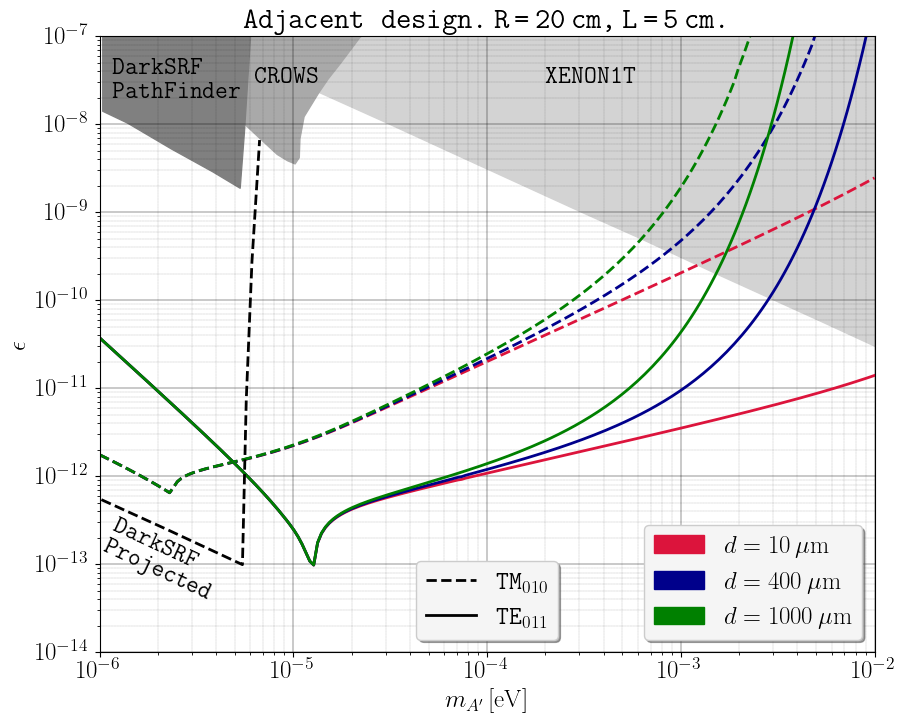

In [12]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(10, 8))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": 'monospace',
    "font.size": 18
})




x_min = 10**(left)
x_max = 10**(right)

y_min = 1e-14
y_max = 1e-7



colors = ['crimson','darkblue','green']*2
linestyles = ['--']*3 +  ['-']*3

data = couplings['DP']['separated']['TM010'] + couplings['DP']['separated']['TE011'] 

for i in range(len(data)):
    data[i] = np.nan_to_num(data[i], nan = 1.)

ax  = fig.add_subplot(1, 1, 1)

ax.set_xlabel(r"$m_{A'} \, [{\rm eV}]$")
ax.set_ylabel(r'$\epsilon$')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.grid(True, which="major", ls='solid', linewidth = 0.3,  color='0')
ax.grid(True, which="minor", ls='dashed', linewidth = 0.1, color='0')

#ax.legend([name_1, name_2, name_3],)

patch0 = mpatches.Patch(color=colors[0], label=d_LaTeX['d1'])
patch1 = mpatches.Patch(color=colors[1], label=d_LaTeX['d2'])
patch2 = mpatches.Patch(color=colors[2], label=d_LaTeX['d3'])

for i in range(len(data)):
    line, = ax.plot(masses.eV.value,data[i], color=colors[i], linewidth=2, linestyle = linestyles[i])

legend1 = ax.legend(handles=[patch0,patch1,patch2],loc='lower right',shadow = True, framealpha=1, facecolor='whitesmoke')
    
# Add the legend manually to the Axes.
ax.add_artist(legend1)

line1, = ax.plot([],[],color='black', label=r'TM$_{010}$', linewidth=2, linestyle = '--')
line2, = ax.plot([],[],color='black', label=r'TE$_{011}$', linewidth=2, linestyle = '-')

# Create another legend for the second line.
ax.legend(handles=[line1, line2], loc='lower center',shadow = True, framealpha=1, facecolor='whitesmoke')

plt.fill_between(XENON1T_mass,XENON1T_coupling,XENON1T_top,color='lightgrey',alpha=1)      
plt.fill_between(CROWS_mass,  CROWS_coupling,CROWS_top,color='darkgrey',alpha=1)
plt.fill_between(DARKSRF_mass,DARKSRF_coupling,DARKSRF_top,color='grey',alpha=1)      

plt.text(1.16e-6, 2e-8, 'DarkSRF\nPathFinder')
plt.text(6.3e-6, 3e-8, 'CROWS')
plt.text(2e-4, 3e-8, 'XENON1T')

plt.title(r'Adjacent design.\,R\,=\,20\,cm,\,L\,=\,5\,cm.')
plt.loglog(DARKSRFpr_mass,DARKSRFpr_coupling,color='0',linestyle='--',linewidth=2, alpha=1)      
plt.text(1e-6, 4e-14, 'DarkSRF\nProjected', color='black', rotation = -25,alpha=1)

plt.savefig('figures/DP_adjacent.png',bbox_inches = 'tight', facecolor='white')
plt.show()

In [13]:
s = setups['DP']['enveloped']['TM010']['d1']
s.Calculate(False)
s.get_plot_data()
couplings['DP']['enveloped']['TM010'].append(
    s.Sensitivity['smoothed'].array.value
)

s = setups['DP']['enveloped']['TM010']['d2']
s.Calculate(False)
s.get_plot_data()
couplings['DP']['enveloped']['TM010'].append(
    s.Sensitivity['smoothed'].array.value
)

s = setups['DP']['enveloped']['TM010']['d3']
s.Calculate(False)
s.get_plot_data()
couplings['DP']['enveloped']['TM010'].append(
    s.Sensitivity['smoothed'].array.value
)

s = setups['DP']['enveloped']['TE011']['d1']
s.Calculate(False)
s.get_plot_data(error_factor=10000)
couplings['DP']['enveloped']['TE011'].append(
    s.Sensitivity['smoothed'].array.value
)

s = setups['DP']['enveloped']['TE011']['d2']
s.Calculate(False)
s.get_plot_data(error_factor=1000)
couplings['DP']['enveloped']['TE011'].append(
    s.Sensitivity['smoothed'].array.value
)

s = setups['DP']['enveloped']['TE011']['d3']
s.Calculate(False)
s.get_plot_data(error_factor=1000)
couplings['DP']['enveloped']['TE011'].append(
    s.Sensitivity['smoothed'].array.value
)

1d-integration... 

100%|█████████████████████████████████████████| 200/200 [00:14<00:00, 13.75it/s]


1d-integration... 

100%|█████████████████████████████████████████| 200/200 [00:13<00:00, 15.16it/s]


1d-integration... 

100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.52it/s]


1d-integration... 

100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 49.90it/s]


1d-integration... 

100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 50.71it/s]


1d-integration... 

100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 51.63it/s]


In [14]:
print(f"R3[d1] = {setups['DP']['enveloped']['TM010']['d1'].R3:.3f}")
print(f"R3[d2] = {setups['DP']['enveloped']['TM010']['d2'].R3:.3f}")
print(f"R3[d2] = {setups['DP']['enveloped']['TM010']['d3'].R3:.3f}")
print(f"L = {setups['DP']['enveloped']['TM010']['d1'].L}")
print(f"R3[d1] = {setups['DP']['enveloped']['TE011']['d1'].R3:.3f}")
print(f"R3[d2] = {setups['DP']['enveloped']['TE011']['d2'].R3:.3f}")
print(f"R3[d3] = {setups['DP']['enveloped']['TE011']['d3'].R3:.3f}")
print(f"L = {setups['DP']['enveloped']['TE011']['d1'].L}")

R3[d1] = 0.099
R3[d2] = 0.099
R3[d2] = 0.100
L = 0.4
R3[d1] = 0.097
R3[d2] = 0.097
R3[d3] = 0.098
L = 0.4


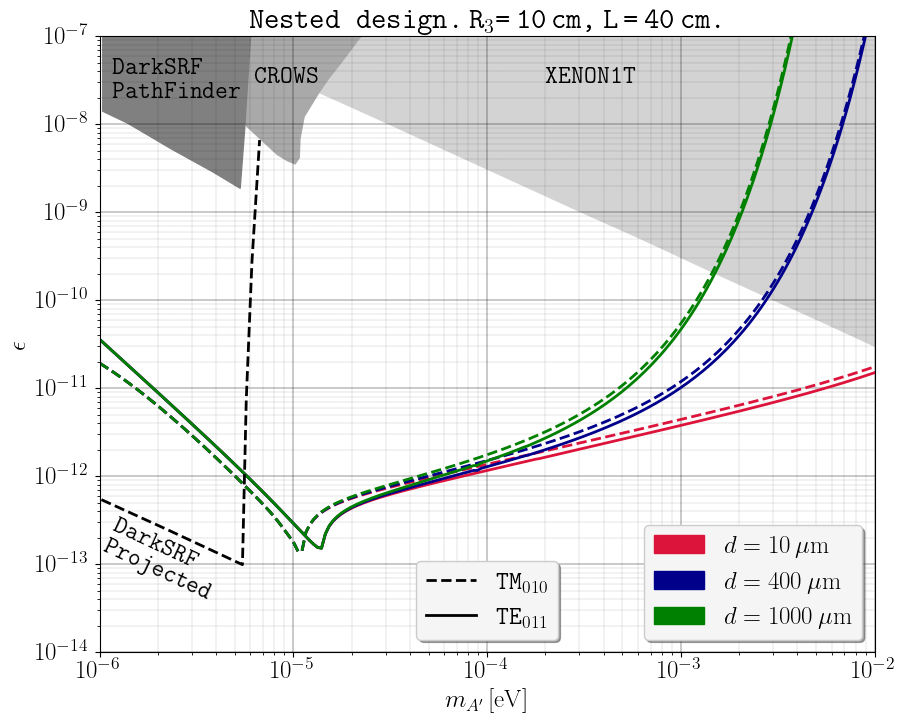

In [15]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(10, 8))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": 'monospace',
    "font.size": 18
})


x_min = 10**(left)
x_max = 10**(right)

y_min = 1e-14
y_max = 1e-7


colors = ['crimson','darkblue','green']*2
linestyles = ['--']*3 +  ['-']*3

data = couplings['DP']['enveloped']['TM010'] + couplings['DP']['enveloped']['TE011']

for i in range(len(data)):
    data[i] = np.nan_to_num(data[i], nan = 1.)

ax  = fig.add_subplot(1, 1, 1)

ax.set_xlabel(r"$m_{A'} \, [{\rm eV}]$")
ax.set_ylabel(r'$\epsilon$')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.grid(True, which="major", ls= 'solid', linewidth = 0.3,  color='0')
ax.grid(True, which="minor",ls='dashed', linewidth = 0.1, color='0')



#ax.legend([name_1, name_2, name_3],)

patch0 = mpatches.Patch(color=colors[0], label=d_LaTeX['d1'])
patch1 = mpatches.Patch(color=colors[1], label=d_LaTeX['d2'])
patch2 = mpatches.Patch(color=colors[2], label=d_LaTeX['d3'])

for i in range(len(data)):
    line, = ax.plot(masses.eV.value,data[i], color=colors[i], linewidth=2, linestyle = linestyles[i])

legend1 = ax.legend(handles=[patch0,patch1,patch2],loc='lower right',shadow = True, framealpha=1, facecolor='whitesmoke')
    
# Add the legend manually to the Axes.
ax.add_artist(legend1)

line1, = ax.plot([],[],color='black', label=r'TM$_{010}$', linewidth=2, linestyle = '--')
line2, = ax.plot([],[],color='black', label=r'TE$_{011}$', linewidth=2, linestyle = '-')

# Create another legend for the second line.
ax.legend(handles=[line1, line2], loc='lower center',shadow = True, framealpha=1, facecolor='whitesmoke')

plt.fill_between(XENON1T_mass,XENON1T_coupling,XENON1T_top,color='lightgrey',alpha=1)      
plt.fill_between(CROWS_mass,  CROWS_coupling,CROWS_top,color='darkgrey',alpha=1)
plt.fill_between(DARKSRF_mass,DARKSRF_coupling,DARKSRF_top,color='grey',alpha=1)      

plt.text(1.16e-6, 2e-8, 'DarkSRF\nPathFinder')
plt.text(6.3e-6, 3e-8, 'CROWS')
plt.text(2e-4, 3e-8, 'XENON1T')

plt.title(r'Nested design.\,R$_{\Large\textrm{3}}$=\,10\,cm,\,L\,=\,40\,cm.')
plt.loglog(DARKSRFpr_mass,DARKSRFpr_coupling,color='0',linestyle='--',linewidth=2, alpha=1)      
plt.text(1e-6, 4e-14, 'DarkSRF\nProjected', color='black', rotation = -25,alpha=1)

plt.savefig('figures/DP_nested.png',bbox_inches = 'tight', facecolor='white')
plt.show()